<a href="https://www.kaggle.com/code/partuza/data-analyst-jobs-eda?scriptVersionId=119686136" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-jobs-analysis/ds.salaries.csv


This dataset contains information about different data analyst jobs from 2020 and 2022

# 1. [Overall look at the data](#1)
# 2. [Data Cleaning](#2)
 1. Cleaning null values
 1. Dropping duplicates rows
 1. Dropping irrelevant columns
 1. Changing data dtypes

# 3. [Visualization](#3)
1. Univariate analyisis
1. Bivariate analyisis

# 4. [Conclusion](#4)

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')

# 1. Overall look at the data<a id="1"></a> <br>

In [4]:
df= pd.read_csv('/kaggle/input/data-science-jobs-analysis/ds.salaries.csv', index_col='Unnamed: 0')

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
df.shape

(607, 11)

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [9]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


# 2. Data Cleaning<a id="2"></a> <br>
### 2.1 Cleaning null values

In [11]:
df.isnull().mean()

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

There are no null values to clean

### 2.2 Looking for duplicates

In [12]:
df.duplicated().sum()

42

Let's drop the 42 duplicated rows


In [13]:
df=df.drop_duplicates(ignore_index=True)

In [14]:
df.shape

(565, 11)

### 2.3 Changing datatypes

### Numerical dtypes

In [15]:
#Usar select_dtypes con np.number returnea las columnas numericas
df.select_dtypes([np.number]).columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 48.7+ KB


* **Work-Year:** I will convert it to int16 because all values are from 2020 to the present
* **Salary:** This column could get some use to see which countries pay the most but that's out of the scope of this analysis
* **Salary_in_usd**: Int64 is absurd, Int32 wil be enough
* **Remote_ratio:** Values are 0,50 and 100. Changing it to int8. Later we will convert this in a categorical

In [17]:
df['work_year']=df['work_year'].astype('int16')
df['remote_ratio']=df['remote_ratio'].astype('int8')
df['salary_in_usd']= df['salary_in_usd'].astype('int32')

## String dtypes

Pandas automatically detects texts columns as object. The object dtype consumes a lot of memory space, sometimes it's possible to change it to categorical.

A categorical variable takes on a limited, and usually fixed, number of possible values, altogether using less memory.

In [18]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,565,565,565,565,565,565,565
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,243,546,130,359,295,318,290


Based on the low quantity of unique values, the next columns will be transformed to the category dtype:
* Employment_type
* Experience_level
* Company_size

In [19]:
categorical_columns=['employment_type','experience_level','company_size']
for col in categorical_columns:
    df[col]= df[col].astype('category')

df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           565 non-null    int16   
 1   experience_level    565 non-null    category
 2   employment_type     565 non-null    category
 3   job_title           565 non-null    object  
 4   salary              565 non-null    int64   
 5   salary_currency     565 non-null    object  
 6   salary_in_usd       565 non-null    int32   
 7   employee_residence  565 non-null    object  
 8   remote_ratio        565 non-null    int8    
 9   company_location    565 non-null    object  
 10  company_size        565 non-null    category
dtypes: category(3), int16(1), int32(1), int64(1), int8(1), object(4)
memory usage: 28.2+ KB


Categorical dtypes must be ordered before plotting to facilitate visualization

In [20]:
#It helps to see which columns are categorical
df.select_dtypes(include='category').columns

Index(['experience_level', 'employment_type', 'company_size'], dtype='object')

**Experiences levels order:**
* EN= Entry Level
* ML= Mid Level
* SE= Senior Level
* EX= Executive

**Employment type order:**
* PT= Part Time
* FT= Full Time
* FL= FreeLance
* CT= Contractor time
Note: The documentation doesn't explain what FL and CT means, oremos

**Company size order:**
* S= Small
* M= Medium
* L= Large

The data will be ordered in ascending order to best visualize it


In [21]:
# Orders the experience level data
exp_level_order=['EN','MI','SE','EX']
df['experience_level']=df['experience_level'].cat.reorder_categories(exp_level_order)

#Orders the employment type
employment_type_order=['PT','FT', 'FL', 'CT']
df['employment_type']=df['employment_type'].cat.reorder_categories(employment_type_order)

company_size_order=['S','M','L']
df['company_size']=df['company_size'].cat.reorder_categories(company_size_order)

# 3. Visualization<a id="3"></a> <br>

## 3.1 Univariate analysis

We'll plot a frequency graph for all columns 


In [22]:
plotable_columns=['work_year', 'experience_level', 'employment_type','remote_ratio', 'company_size']

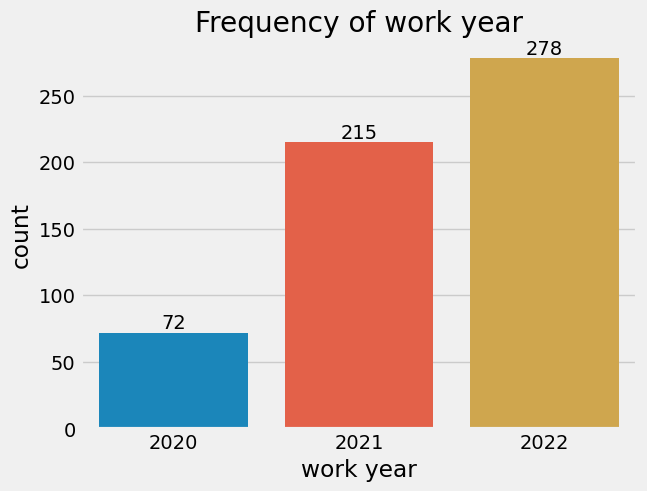

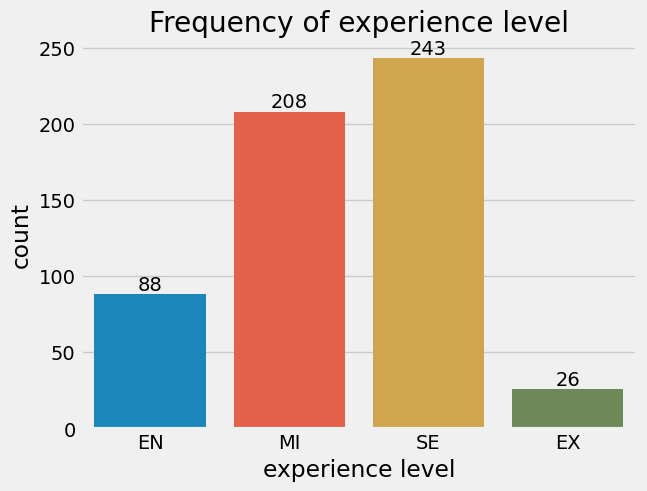

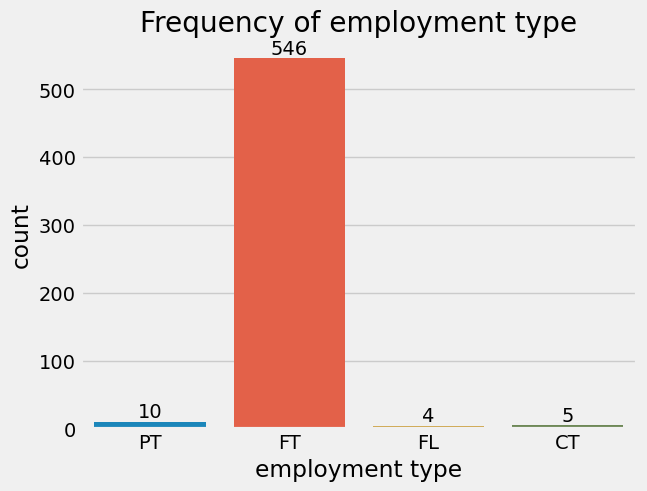

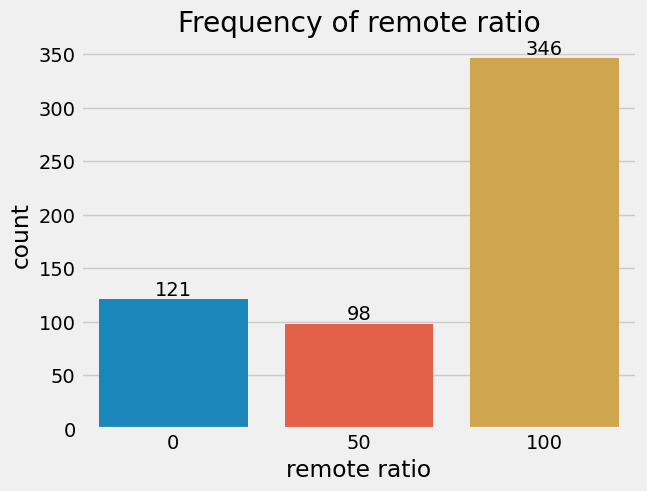

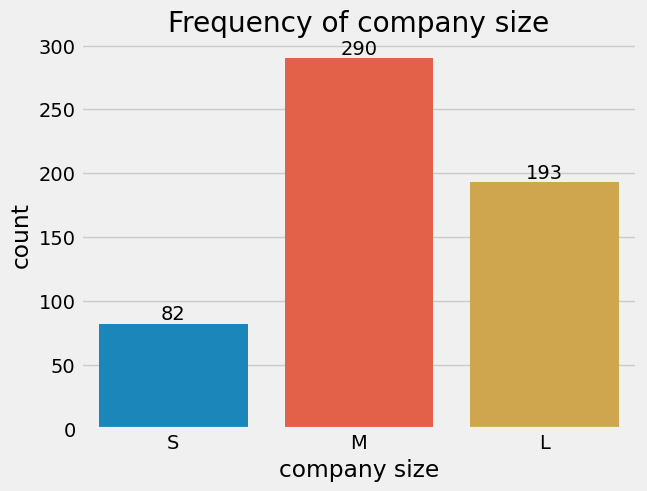

In [23]:
df.columns
for col in plotable_columns:
    ax = sns.countplot(x=col, data=df)
    ax.bar_label(ax.containers[0])
    col_good_title= col.replace('_',' ')
    plt.title(f'Frequency of {col_good_title}')
    plt.xlabel(f'{col_good_title}')
    plt.show()
    print('')


* **work_year:** The majority of the values correspond to the year 2022
* **experience_level**: Senior level jobs are first with a close second medium level jobs
* **employment_type**: The immensely majority of works are Full Time
* **remote_ratio**: Three fifths of jobs are completely remote. And more jobs demand work in the office than part-remote
* **company_size**: The majority of companies are medium size


Text(0.5, 1.0, 'Frequency of salaries in usd')

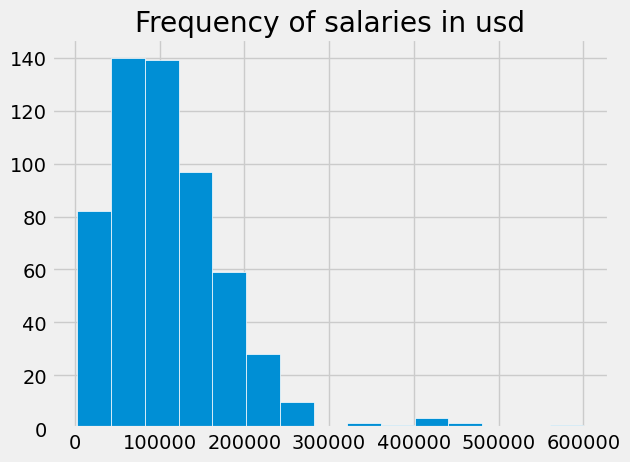

In [24]:
plt.hist(data=df, x='salary_in_usd',bins=15, ec='white')
plt.title('Frequency of salaries in usd')

The majority of salaries are between 70.000 and 150.000

## 3.2 Bivariate analysis

### Salary through the years
Salary is a complex variable because each country has a different cost of living. A salary of 1000 USD in the USA is different from the same salary but in Argentina.

Text(0, 0.5, 'Salary in USD')

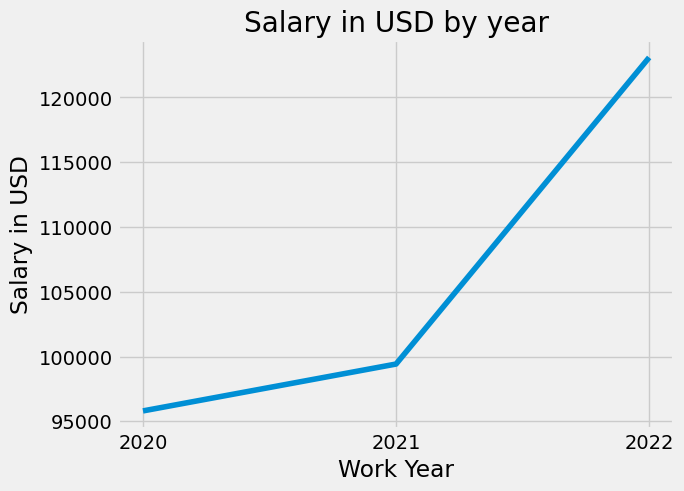

In [25]:
fig, ax = plt.subplots()
ax= sns.lineplot(df, x='work_year', y='salary_in_usd', errorbar=None)
plt.xticks(ticks=[2020,2021,2022])
ax.set_title('Salary in USD by year')
ax.set_xlabel('Work Year')
ax.set_ylabel('Salary in USD')

## Salary by remote ratio

Working from home has it's benefits, but is the salary the same?

Text(-27.805555555555557, 0.5, 'Salary in usd')

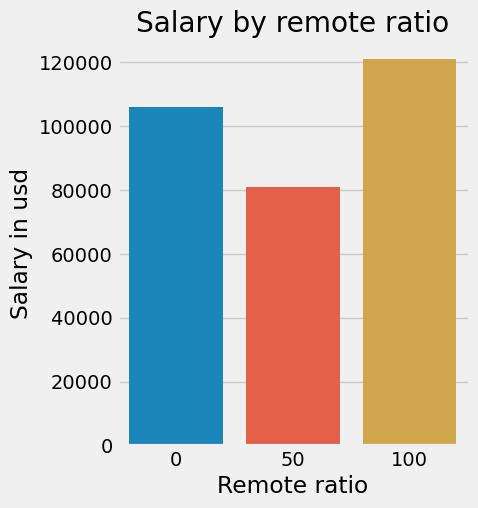

In [26]:
sns.catplot(data=df,
            x='remote_ratio',
            y='salary_in_usd',
            kind='bar',
            errorbar=None)
plt.title('Salary by remote ratio')
plt.xlabel('Remote ratio')
plt.ylabel('Salary in usd')


* Full remote jobs are the most paid
* Hybrids jobs pay the least

## What size are the best paying companies?

Text(-27.805555555555557, 0.5, 'Salary in usd')

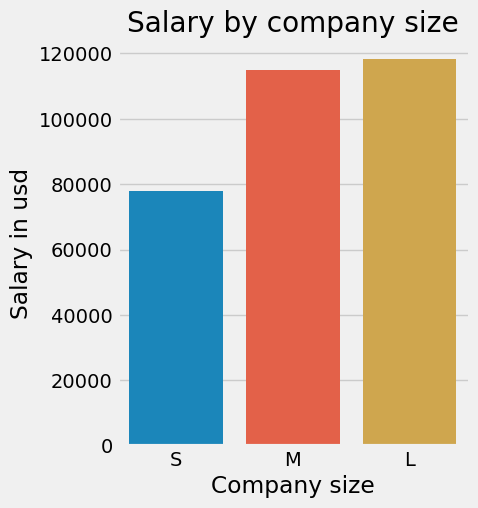

In [27]:
sns.catplot(data=df,
            x='company_size',
            y='salary_in_usd',
            kind='bar',
            errorbar=None)
plt.title('Salary by company size')
plt.xlabel('Company size')
plt.ylabel('Salary in usd')

* Large and medium sized companies are the ones that pay the best

## Which were the most common job titles per year?

We all know the big 3: Data Scientist, Data Engineer and Data Analyst

Let's see how they looked through the years

In [28]:
#df.groupby(['work_year'], sort=False)['job_title'].max()
#sns.countplot(x=df.groupby('work_year'), data=df)
df2020= df[df['work_year']==2020]['job_title'].value_counts()[0:3]
df2021= df[df['work_year']==2021]['job_title'].value_counts()[0:3]
df2022= df[df['work_year']==2022]['job_title'].value_counts()[0:3]


([<matplotlib.axis.YTick at 0x7fdd9699a090>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

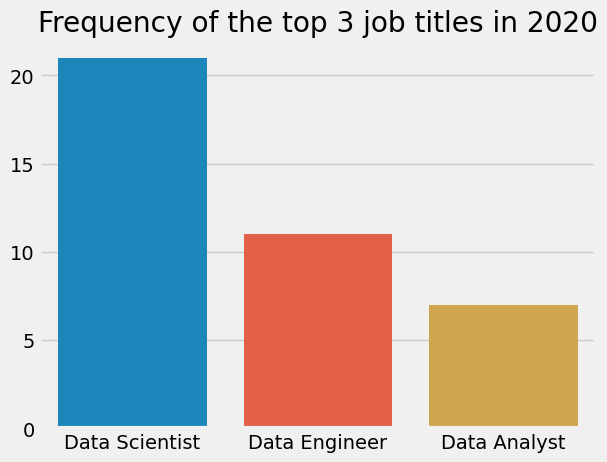

In [29]:
sns.barplot(y=df2020.values, x=df2020.index)
plt.title('Frequency of the top 3 job titles in 2020')
plt.xticks(rotation=0)
plt.yticks([0,5,10,15,20])

(array([0, 1, 2]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Data Engineer'),
  Text(2, 0, 'Machine Learning Engineer')])

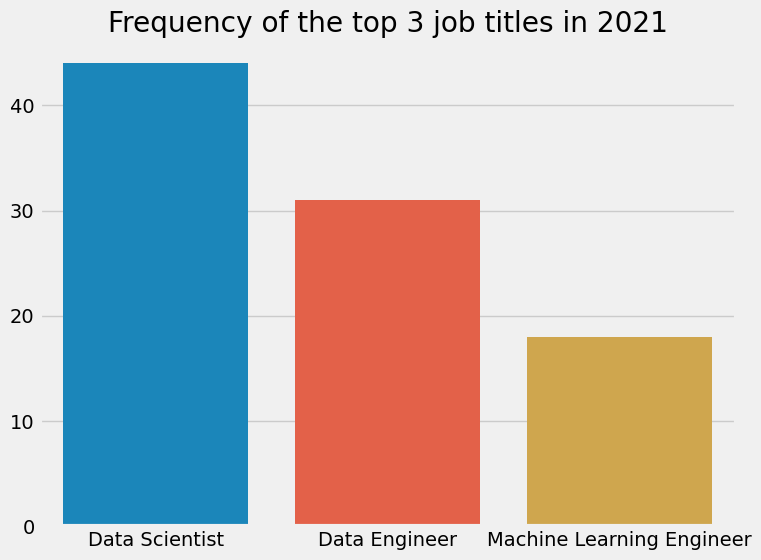

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(y=df2021.values, x=df2021.index)
plt.title('Frequency of the top 3 job titles in 2021')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Data Engineer'),
  Text(1, 0, 'Data Scientist'),
  Text(2, 0, 'Data Analyst')])

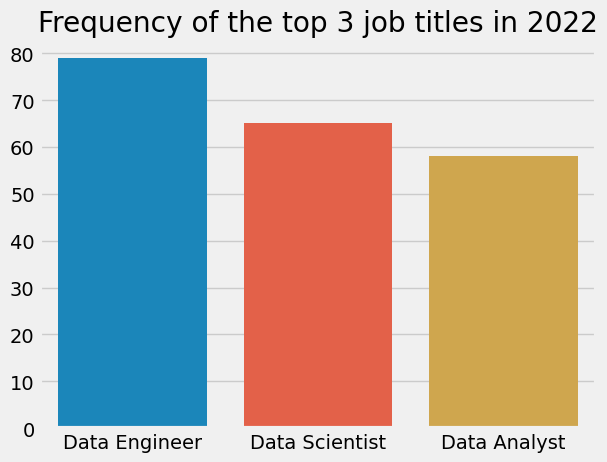

In [31]:
sns.barplot(y=df2022.values, x=df2022.index)
plt.title('Frequency of the top 3 job titles in 2022')
plt.xticks(rotation=0)

* In both 2020 and 2021, Data Scientist was the most popular job
* 2022 is the only year where Data Engineer took the first spot
* In 2021, Machine Learning Engineer appeared over Data Analyst

## Analyzing experience level

Text(0.5, 15.444444444444438, 'Experience Level')

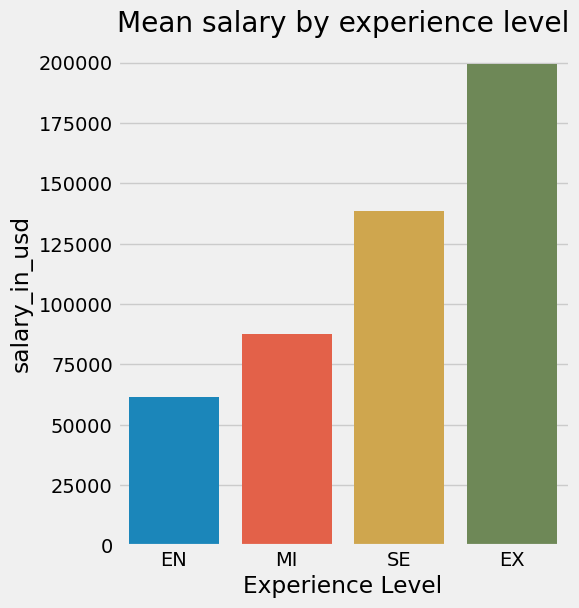

In [32]:
ax = sns.catplot(
    data=df, kind="bar",
    x="experience_level", y="salary_in_usd", height=6,
    errorbar=None
)
plt.title('Mean salary by experience level')
plt.xlabel('Experience Level')

As expected, the more experience, the highest the salary

## What's the relationship between company size and remote ratio?

Are big companies offering the most remote works?

In [33]:
result_company_ratio=pd.crosstab(
index=df['company_size'],
columns=df['remote_ratio'],
normalize='index').round(4)*100 # Helps the readability 
#result_company_ratio.style.format("{:.0%}")


Text(0.5, 0, 'Company size')

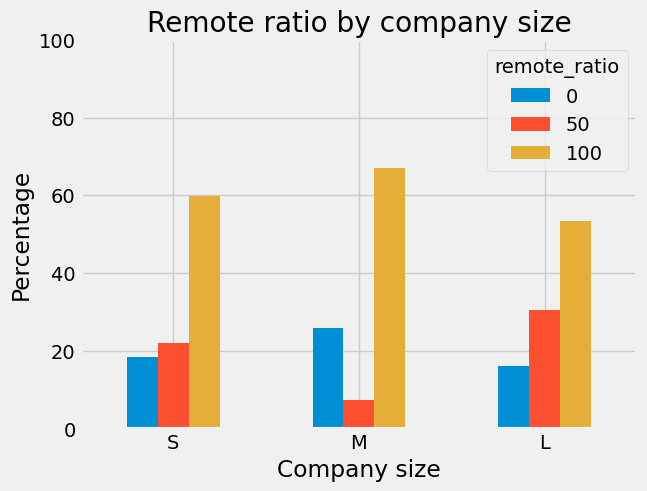

In [34]:
result_company_ratio.plot(kind='bar', rot=0, label='Remote ratio')
plt.title('Remote ratio by company size')
plt.ylabel('Percentage')
plt.ylim(bottom=0, top=100)
plt.xlabel('Company size')

* All companies offer a high ratio of full remote jobs
* Medium companies are offering the most full remote job 

## Are companies more willing to offer full remote jobs to experienced employees?

In [35]:
crosstab_exp_ratio=pd.crosstab(
index=df['experience_level'],
columns=df['remote_ratio'],
normalize='index').round(4)*100 # round(4)*100 helps the readability 

Text(0.5, 0, 'Experience Level')

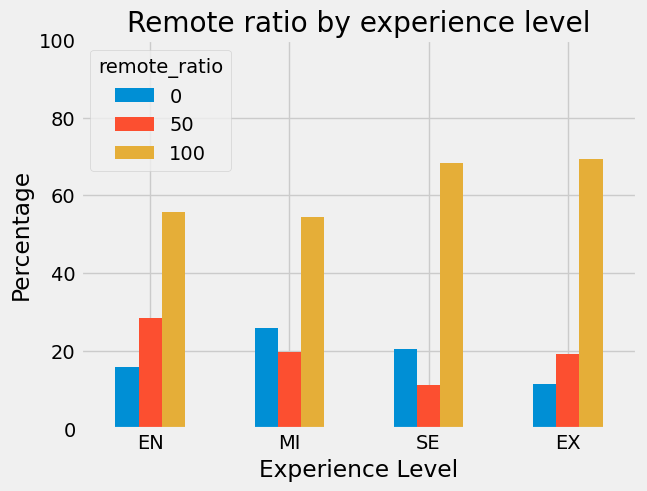

In [36]:
crosstab_exp_ratio.plot(kind='bar', rot=0, label='Remote ratio')
plt.title('Remote ratio by experience level')
plt.ylabel('Percentage')
plt.ylim(bottom=0, top=100)
plt.xlabel('Experience Level')

* I expected the entry level position to have the highest percentage of on-site workers
* Senior and Executive jobs offer the highest percentage of full remote positions

# 4. Conclusion<a id="4"></a> <br>

* **Work year:** The majority of the values correspond to the year 2022
* **Experience level**: Senior level jobs are first with a close second medium level jobs
* **Employment type**: The immensely majority of works are Full Time
* **Remote ratio**: Three fifths of jobs are completely remote. And more jobs demand work in the office than part-remote
* **Company size**: The majority of companies are medium size
* The majority of salaries are between 70.000 and 150.000


* **Full remote** jobs are the **most paid**
* **Hybrids jobs** pay the least
* Large and medium sized companies are the ones that pay the best
* In both **2020 and 2021**, **Data Scientist** was the most popular job
* **All companies** offer a high ratio of **full remote jobs**
* Medium companies are offering the most full remote job 
* Senior and Executive jobs offer the highest percentage of full remote positions


Thanks for reading!
